In [97]:
#import dependencies
import requests
from config import api_key
import json
from pprint import pprint
import csv
import os
import pandas as pd
from pandas.io.json import json_normalize
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import numpy as np

In [98]:
#Reading the lat long from a csv file
file_path = os.path.join("census_data_summary.csv")
lat_lon_dataset = pd.read_csv(file_path)
lat_lon_dataset.head()

,zcta,Median Age,Education Score,per_capita_inc,Diversity,population,lat,lon
0,601,37.6,0,7453.0,Non Diverse,18570.0,18.180555,-66.749961
1,602,39.5,1,8474.0,Diverse,41520.0,18.362268,-67.176130
2,603,39.9,1,10179.0,Diverse,54689.0,18.455183,-67.119887
3,606,40.8,0,5863.0,Diverse,6615.0,18.158345,-66.932911
4,610,40.2,0,8452.0,Diverse,29016.0,18.290955,-67.125868


In [34]:
#finding the events for lat long
urlname_list = []
lat_list = []
lon_list = []
event_id_list = []
count = 0

for index, row in lat_lon_dataset.head(1000).iterrows():
    base_url = "https://api.meetup.com/2/open_events"
    params = {"key": api_key,
               "lat":lat_lon_dataset.loc[index][6],
               "lon":lat_lon_dataset.loc[index][7],
               "radius":50,
               }
    url = requests.get(base_url,params=params)
    events = url.json()  
    
        
    if int(url.headers['X-RateLimit-Remaining']) <= 2:
         time.sleep(10)
    try:        
         events = url.json()
    except Exception as e:
         pass
        
    if(len(events['results'])):

        for event in events:    
         
            url_name = events['results'][0]["group"]['urlname']
            urlname_list.append(url_name)
            event_id = events["results"][0]["id"]
            event_id_list.append(event_id)
            lat_list.append(params['lat'])
            lon_list.append(params['lon'])

            if count % 1000  == 0:
                print(count)

            count = count+1
                
# #print(urlname_list)
# #print(lon_list)
# df_events_urlname = pd.DataFrame.from_dict(json_normalize(urlname_list,lat_list,lon_list ), orient='columns')
# # df_events_urlname
# # df_groups.to_csv("df_groups.csv", encoding="utf-8", index=False)

    

0
1000


In [105]:
pd_urlname = pd.DataFrame({"Event ID":event_id_list, "url":urlname_list })
pd_urlname.to_csv("Events_urlname.csv", encoding="utf-8", index=False)

In [144]:
sentiments = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter = 0

for index, row in pd_urlname.iterrows():
    base_url = "https://api.meetup.com/"+str(pd_urlname.loc[index][1])+"/events/"+str(pd_urlname.loc[index][0])+"/comments"
    params = {"key": api_key
             }
    url1 = requests.get(base_url,params=params)
    comments_data = url1.json()
    if int(url1.headers['X-RateLimit-Remaining']) <= 2:
         time.sleep(10)
    for comment in comments_data:
        comments = comment["comment"]
        results = analyzer.polarity_scores(comments)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

        sentiments.append({"urlname":  pd_urlname.loc[index][1],
                       "Event ID":pd_urlname.loc[index][0],
                       "Compound": np.mean(compound_list),
                        "Positive": np.mean(positive_list),
                        "Negative": np.mean(negative_list),
                        "Neutral": np.mean(neutral_list)
                        })

        # Add to counter 
        counter = counter + 1


In [135]:
    

    
#     for comment in comments_data:
#         comments = comment["comment"]
#         results = analyzer.polarity_scores(comments)
#         compound = results["compound"]
#         pos = results["pos"]
#         neu = results["neu"]
#         neg = results["neg"]

#         compound_list.append(compound)
#         positive_list.append(pos)
#         negative_list.append(neg)
#         neutral_list.append(neu)

#         sentiments.append({"urlname":  pd_urlname.loc[index][1],
#                        "Event ID":pd_urlname.loc[index][0],
#                        "Compound": np.mean(compound_list),
#                         "Positive": np.mean(positive_list),
#                         "Negative": np.mean(negative_list),
#                         "Neutral": np.mean(neutral_list)
#                         })

#         # Add to counter 
#         counter = counter + 1


In [145]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("Sentiments.csv", encoding="utf-8", index=False)
sentiments_pd


,Compound,Event ID,Negative,Neutral,Positive,urlname
0,0.673400,237589543,0.000000,0.685000,0.315000,travel-1067
1,0.537650,237589543,0.000000,0.777500,0.222500,travel-1067
2,0.358433,237589543,0.000000,0.851667,0.148333,travel-1067
3,0.452300,237589543,0.000000,0.808250,0.191750,travel-1067
4,0.361840,237589543,0.000000,0.846600,0.153400,travel-1067
5,0.360317,237589543,0.000000,0.828833,0.171167,travel-1067
6,0.405043,237589543,0.000000,0.808286,0.191714,travel-1067
7,0.404650,237589543,0.000000,0.816000,0.184000,travel-1067
8,0.359689,237589543,0.000000,0.836444,0.163556,travel-1067
9,0.397110,237589543,0.000000,0.820600,0.179400,travel-1067


In [146]:
temp = sentiments_pd.groupby(["Event ID"], as_index = False).mean()
avg_sentiments = pd.DataFrame(temp)
avg_sentiments

,Event ID,Compound,Negative,Neutral,Positive
0,237589543,0.361200,0.000000,0.828552,0.171448
1,239515018,0.359550,0.000000,0.828952,0.171048
2,243834365,0.332541,0.007016,0.832536,0.160448
3,244545937,0.305409,0.026240,0.805629,0.168134
4,245133669,0.317516,0.011033,0.835023,0.153944
5,245171235,0.325183,0.021678,0.806017,0.172309
6,245186294,0.305919,0.026365,0.804297,0.169342
7,245187190,0.302041,0.025885,0.807565,0.166550
8,245273746,0.318681,0.023324,0.805607,0.171073
9,245282056,0.317393,0.020155,0.813675,0.166174


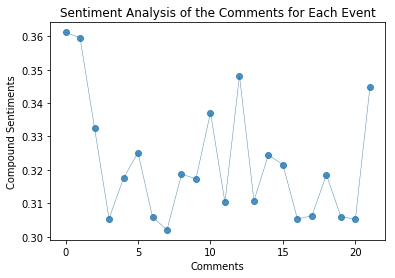

In [147]:
# Create plot
plt.plot(np.arange(len(avg_sentiments["Event ID"])),
         avg_sentiments["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)
# Incorporate the other graph properties
plt.title("Sentiment Analysis of the Comments for Each Event")
plt.ylabel("Compound Sentiments")
plt.xlabel("Comments")
plt.savefig('Compound_Sentiments.png')
plt.show()